In [ ]:
#matplotlibの日本語化のためのライブラリのインストール
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=9038de7ca5e72ffd14a385e9c2fe9e74dcf7358999259b47a8dfe79a23cc11f5
  Stored in directory: /root/.cache/pip/wheels/91/8f/c2/83055ad0c9591b0a094730aa7cb2cc12fedacbcd2241baf534
Successfully built japanize-matplotlib


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as optimize

import numpy as np
from scipy import interpolate
import japanize_matplotlib

In [ ]:
I0=1367 #太陽定数
α=0.31 #平均的なアルベド

In [ ]:
#１日間における温度変化の高度分布のnumpy配列データを読み見込む
saitekika_data = np.load("/content/drive/MyDrive/9layer/20181007_temp_level.npy")

#初期条件における温度の高度分布を表示
print(saitekika_data[0])

[299.02020264 297.36727905 295.57479858 293.93093872 292.73724365
 291.89920044 289.99841309 284.05322266 275.82035828 268.64593506
 256.35975647 243.07019043 234.15953064 222.98309326 209.88894653
 199.81057739]


In [ ]:
#1日間の下向き放射フラックス変化のnumpy配列データを読み込む
rad_data = np.load("/content/drive/MyDrive/9layer/20181007_rad_time.npy")
print(rad_data)
rad = 0
for i in range(24):
  rad += rad_data[i]
ave_rad = rad/24

#１日間の平均下向き放射フラックスを表示
print(ave_rad)

[  0.           0.           0.           0.           0.
   2.5         98.375      289.86936522 462.74231911 606.03303528
 710.04921055 693.51055717 601.73411751 480.76080418 342.2964797
 189.10360146  59.61423253   1.3125       0.           0.
   0.           0.           0.           0.        ]
189.0792176121225


[ 0.1108849   0.32338553  0.54034503  0.76197805  0.98851578  1.45732329
  1.9490202   3.01223131  4.20649392  5.57452897  7.18555496  9.16410833
 10.36311692 11.77509389 13.50918871 15.79757606]


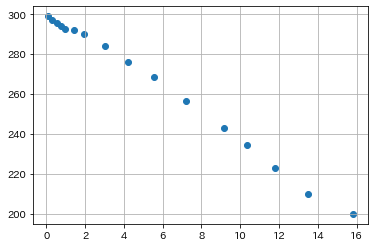

In [ ]:
#GPVデータのある気圧高度の配列
levels = [1000,975,950,925,900,850,800,700,600,500,400,300,250,200,150,100] 
#モデルの各層における気圧高度の配列
kiatsu_9 = [1000,991,926,822,664,500,336,189,74,9]

#気圧から高度に変換する関数
def pa_height(ary):
  a = np.zeros(16)
  for i in range(16):
    a[i] = 44.331514-ary[i]**(1/5.255877)*11.880516
  return a

height = pa_height(levels)

#高度(km)と温度(K)の分布
plt.scatter(height, saitekika_data[0])
plt.grid()
print(height)

In [ ]:
kiatsu_9 = [1000,991,926,822,664,500,336,189,100,9]
def pa_height9(ary):
  a = np.zeros(10)
  for i in range(10):
    a[i] = 44.331514-ary[i]**(1/5.255877)*11.880516
  return a

height_9 = pa_height9(kiatsu_9)
print(height_9)

[ 0.1108849   0.18688435  0.75302016  1.72969371  3.42522845  5.57452897
  8.39758463 12.12362794 15.79757606 26.28503248]


levels = [9,74,189,336,500,664,811,926,991,1000]

In [ ]:
levels_9 = [100,189,336,500,664,811,926,991,1000]

#2次式のスプライン補間をλ式で定義
method = lambda x, y: interpolate.interp1d(x, y, kind="quadratic")
levels = [1000,975,950,925,900,850,800,700,600,500,400,300,250,200,150,100] 
kinji_ondo_day = [[0.0 for i in range(9)] for j in range(9)]

for i in range(9):

  fitted_curve = method(levels, saitekika_data[i])
  kinji_ondo_day[i] = fitted_curve(levels_9)

print(kinji_ondo_day)

[array([199.81057739, 220.16116308, 248.31650041, 268.64593506,
       281.17008516, 290.4999    , 293.98951622, 298.44604406,
       299.02020264]), array([199.47285461, 220.66462146, 246.19530939, 268.21868896,
       282.40687966, 290.87894009, 294.39298848, 297.83254623,
       298.37493896]), array([200.05299377, 221.60077923, 244.85772813, 267.00827026,
       282.93614932, 291.21579349, 295.65793961, 297.50243354,
       298.05389404]), array([200.58538818, 220.14440185, 246.614548  , 267.28448486,
       282.02899096, 289.83321707, 296.5867895 , 300.35271971,
       301.27001953]), array([199.95365906, 219.99019017, 246.1294643 , 266.61584473,
       281.17926228, 288.05508267, 296.05190543, 302.02545287,
       302.97134399]), array([200.32971191, 219.90862963, 245.8677428 , 266.06747437,
       280.34840291, 287.04582415, 295.64432763, 301.46735905,
       302.31863403]), array([200.34899902, 219.79972549, 246.32991671, 265.33227539,
       279.20044291, 286.63479759, 294.365

In [ ]:
# 1日における平均
average_ondo = [0 for i in range(9)]
for i in range(9):
  average_ondo += kinji_ondo_day[i]
average_ondo /=  9

print(average_ondo)

[200.47932265 220.17594239 246.15231161 266.54605103 281.26723671
 288.29100067 294.60201408 298.67838176 299.32692125]


In [ ]:
average = [0.0 for i in range(11)] 
for i in range(11):
  average[i] = average_ondo[8-i] 

#成層圏の温度として-30℃、宇宙空間の温度として絶対零度を採用
average[9] = 243
average[10] = 0

average = [average[i]-273 for i in range(11)]
print(average)

[26.326921251085082, 25.678381762558956, 21.6020140815196, 15.291000671245683, 8.267236712364138, -6.453948974609375, -26.84768839206268, -52.82405760811136, -72.5206773546007, -30, -273]


In [ ]:
#どれだけ吸収されずに透過するのか計算する関数
def abs(ε,h,k):
  pro = 1.0
  for i in range(k-h-1):
    pro *= (1-ε[h+i+1])
  return pro

In [ ]:
def cond_rep(variable):
  import numpy as np

  #目的関数を初期化

  goal = 0
  lay_num = 11
  #最適化におけるループの回数
  rp = 50
  rad_abs = ave_rad*(1-α)
  tmp = average
  ε = np.zeros(lay_num)
  ε[0:lay_num-1] = variable[0:lay_num-1]
  ε[0] = 0.97
  ε[lay_num-1] = 1

  #成層圏における吸収するフラックスをある係数で地表面に到達する下向き放射フラックス割って求める
  seisouken_hosha = 23



  for i in range(rp):

    #コンダクタンスの配列を用意、すべての気層間におけるコンダクタンスを定義（condはconductance（熱抵抗の逆数））
    cond = [[0.0 for i in range(lay_num)] for j in range(lay_num)]

    #コンダクタンスを計算
    for i in range(lay_num):
      for j in range(lay_num-i-1):
        cond[i][i+j+1] = (5.67*10**-8)*((273+tmp[i])**2+(273+tmp[i+j+1])**2)*((273+tmp[i])+(273+tmp[i+j+1]))*abs(ε,i,i+j+1)*ε[i]*ε[i+j+1]
    
    #熱伝導マトリクスと荷重ベクトルの配列を用意
    matrix_0 = np.array([[0.0 for i in range(lay_num)] for j in range(lay_num)])
    matrix_1 = np.array([0.0 for i in range(lay_num)])
    matrix_1[0] = rad_abs
    matrix_1[9] = rad_abs/seisouken_hosha

    #熱伝導マトリクスを計算
    for i in range(lay_num):
      for j in range(lay_num-i-1):
        el = cond[i][i+j+1]
        matrix_0[i][i+j+1] -= el
        matrix_0[i+j+1][i] -= el
        matrix_0[i][i] += el
        matrix_0[i+j+1][i+j+1] += el
    
    matrix_1[lay_num-1] = -273
    for i in range(lay_num-1):
      matrix_0[lay_num-1][i]= 0

    matrix_0[lay_num-1][lay_num-1] = 1
    matrix_inv = np.linalg.inv(matrix_0)
    tmp_after = np.dot(matrix_inv,matrix_1)

    #温度の変化に学習係数をかける
    tmp_before = tmp    
    tmp = (tmp_after-tmp_before)/30+tmp_before

    for i in range(10):
      goal+=(tmp[i]-average[i])**2
  print(tmp)
  return goal

In [ ]:
variable = [1.        , 0.01005921, 0.11274258, 0.53617378, 0.4112379 ,
       0.80972923, 0.79033861, 0.56289999, 0.47630515, 0.02174475]
#最適化における変数境界
bnds = ((0.9,1),(0.01,1),(0.01,1),(0.02,1),(0.04,1),(0.04,1),(0.04,1),(0.04,1),(0.04,1),(0.01,1))

#目的関数の最小化をscipyのoptimize.minimize メソッドを利用して実行
mi_rmse=optimize.minimize(cond_rep,variable,bounds = bnds , method='Nelder-Mead')
print(mi_rmse)

ストリーミング出力は最後の 5000 行に切り捨てられました。
 -273.        ]
[  31.13488471   21.65268214   20.56313189   15.78454326    7.42398192
   -5.52244786  -27.56766173  -52.47396087  -72.62854285  -29.98552365
 -273.        ]
[  31.13309906   21.65184734   20.57538362   15.81593841    7.40974275
   -5.64096393  -27.6422748   -52.38457021  -72.55646144  -30.06926012
 -273.        ]
[  31.07907501   21.59345352   20.44883571   15.58143556    7.33740041
   -5.65746806  -27.70023466  -52.3930922   -72.70852719  -30.02029062
 -273.        ]
[  31.16932738   21.6883398    20.60459888   15.83797532    7.48507942
   -5.32767514  -27.42750705  -52.60358575  -72.67911909  -29.87771677
 -273.        ]
[  31.15683889   21.6761966    20.61270888   15.88468995    7.45685411
   -5.35956441  -27.39900963  -52.5454574   -72.54733489  -30.13268404
 -273.        ]
[  31.14099683   21.65802346   20.62410597   15.89102193    7.31856374
   -5.61989648  -27.61975709  -52.57462754  -72.46633459  -29.98821587
 -273.        ]
[  3

In [ ]:
result = [  28.45991974  , 24.39680751,   19.98629329 ,  15.23998437,    9.64626756
,   -6.0097522,   -28.13839437 , -51.82193166 , -73.03957109,  -29.99028836
, -273.        ]

<class 'numpy.ndarray'>
<class 'list'>
16
17


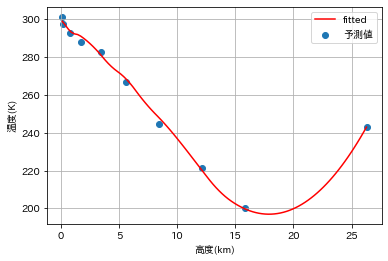

In [ ]:
x_latent = np.linspace(0.12, 26.28, 100)
x1 = height_9
# print(x_latent)
fig, ax = plt.subplots()

result = [  28.45991974  , 24.39680751,   19.98629329 ,  15.23998437,    9.64626756
,   -6.0097522,   -28.13839437 , -51.82193166 , -73.03957109,  -29.99028836    ]
result = result[0:10]
for i in range(10):
  result[i] = result[i]+273
saidata = saitekika_data[0].tolist()
saidata.append(243)
height_list = height.tolist()
height_list.append(26.28503248)

print(type(height))
print(type(saidata))
print(len(height))
print(len(saidata))

method = lambda x, y: interpolate.interp1d(x, y, kind="quadratic")
fitted_curve = method(height_list,saidata )

plt.plot(x_latent, fitted_curve(x_latent), c="red", label="fitted")
plt.scatter(x1,result , label="予測値")



ax.set_xlabel('高度(km)')  # x軸ラベル
ax.set_ylabel('温度(K)')  # y軸ラベル
plt.grid()
plt.legend()
plt.show()


<class 'numpy.ndarray'>
<class 'list'>
16
17


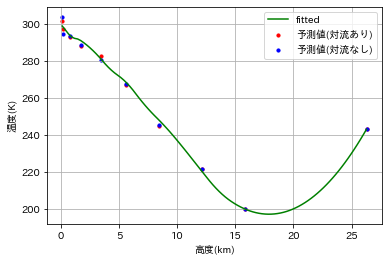

In [ ]:
import numpy as np
from scipy import interpolate
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
x_latent = np.linspace(0.12, 26.28, 100)
x1 = height_9
# print(x_latent)
fig, ax = plt.subplots()

result1 = [  28.45991974  , 24.39680751,   19.98629329 ,  15.23998437,    9.64626756
,   -6.0097522,   -28.13839437 , -51.82193166 , -73.03957109,  -29.99028836    ]
result2 = [  31.11537739 ,  21.63364747,   20.79195363,   15.78032324 ,   7.75679214,
   -5.63411943,  -27.87645737 , -51.83694601,  -73.15710289,  -29.99146514
, -273.        ]

result1 = result1[0:10]
for i in range(10):
  result1[i] = result1[i]+273

result2 = result2[0:10]
for i in range(10):
  result2[i] = result2[i]+273

saidata = saitekika_data[0].tolist()
saidata.append(243)
height_list = height.tolist()
height_list.append(26.28503248)

print(type(height))
print(type(saidata))
print(len(height))
print(len(saidata))

method = lambda x, y: interpolate.interp1d(x, y, kind="quadratic")
fitted_curve = method(height_list,saidata )

plt.plot(x_latent, fitted_curve(x_latent), c="green", label="fitted")
plt.scatter(x1,result1 , label="予測値(対流あり)", s=10, c="red")
plt.scatter(x1,result2 , label="予測値(対流なし)", s=10, c="blue")



ax.set_xlabel('高度(km)')  # x軸ラベル
ax.set_ylabel('温度(K)')  # y軸ラベル
plt.grid()
plt.legend()
plt.show()


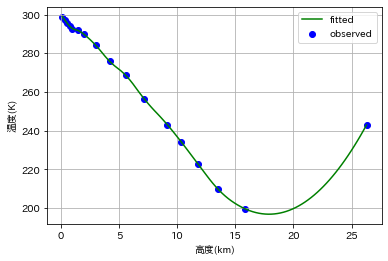

In [ ]:
import numpy as np
from scipy import interpolate
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
x_latent = np.linspace(0.12, 26.28, 100)
# print(x_latent)
fig, ax = plt.subplots()

method = lambda x, y: interpolate.interp1d(x, y, kind="quadratic")
fitted_curve = method(height_list, saidata)
plt.scatter(height_list, saidata,c = "blue", label="observed")
plt.plot(x_latent, fitted_curve(x_latent), c="green", label="fitted")
ax.set_xlabel('高度(km)')  # x軸ラベル
ax.set_ylabel('温度(K)')  # y軸ラベル
plt.grid()
plt.legend()
plt.show()